# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset dari file CSV
data = pd.read_csv("Dataset_inisiasi.csv")

# Menampilkan informasi umum tentang DataFrame untuk memastikan data telah dimuat dengan benar
data.info()
print('\n')

# Menampilkan beberapa baris pertama dari DataFrame
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75948 entries, 0 to 75947
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       75948 non-null  object 
 1   Customer_ID    75948 non-null  object 
 2   Customer_Type  75948 non-null  object 
 3   Product        75948 non-null  object 
 4   Category       75948 non-null  object 
 5   Unit_Price     75948 non-null  float64
 6   Quantity       75948 non-null  float64
 7   Discount       75948 non-null  float64
 8   Total_Price    75948 non-null  float64
 9   Region         75948 non-null  object 
 10  Order_Date     75948 non-null  object 
 11  Cluster        75948 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 7.0+ MB




,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
2,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
3,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
4,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Menghapus kolom yang dianggap kurang relevan untuk analisis
data = data.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date'])

# Menghapus data duplikat dan mengatur ulang indeks
data = data.drop_duplicates(ignore_index=True)

# Menampilkan informasi terbaru dari DataFrame setelah pemrosesan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43196 entries, 0 to 43195
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  43196 non-null  object 
 1   Product        43196 non-null  object 
 2   Category       43196 non-null  object 
 3   Unit_Price     43196 non-null  float64
 4   Quantity       43196 non-null  float64
 5   Discount       43196 non-null  float64
 6   Total_Price    43196 non-null  float64
 7   Region         43196 non-null  object 
 8   Cluster        43196 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 3.0+ MB


In [4]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data.drop(columns=['Cluster'])  # Menghapus kolom 'Cluster' untuk dijadikan fitur
y = data['Cluster']  # Menyimpan kolom 'Cluster' sebagai target klasifikasi

# Menampilkan beberapa baris pertama dari fitur yang telah dipisahkan
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen


In [5]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,0.117647,0.089552,0.0,0.042820,Bremen
1,B2B,Selters,Water,0.063725,0.671642,1.0,0.178848,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,0.385621,0.432836,0.5,0.467946,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.096405,0.029851,0.0,0.014827,Hessen
4,B2C,Beck's,Alcoholic Beverages,0.178105,0.044776,0.0,0.032730,Bremen


In [6]:
# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada setiap kolom yang bersifat kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

# Menampilkan beberapa baris pertama dari dataset setelah encoding
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,0.117647,0.089552,0.0,0.042820,4
1,0,32,3,0.063725,0.671642,1.0,0.178848,13
2,0,20,2,0.385621,0.432836,0.5,0.467946,14
3,1,29,3,0.096405,0.029851,0.0,0.014827,6
4,1,2,0,0.178105,0.044776,0.0,0.032730,4


In [7]:
# Memisahkan data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Menampilkan bentuk dari set pelatihan dan set uji untuk verifikasi
print(f"Ukuran set pelatihan: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Ukuran set uji: X_test={X_test.shape}, y_test={y_test.shape}")

Ukuran set pelatihan: X_train=(34556, 8), y_train=(34556,)
Ukuran set uji: X_test=(8640, 8), y_test=(8640,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Melatih model Naive Bayes
nb = GaussianNB().fit(X_train, y_train)

# Melatih model Random Forest
rf = RandomForestClassifier(random_state=69).fit(X_train, y_train)

# Menampilkan status bahwa proses pelatihan telah selesai
print("Proses pelatihan model selesai.")

Proses pelatihan model selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### **Penjelasan Algoritma yang Digunakan dalam Klasifikasi**  

Dalam proses klasifikasi ini, digunakan dua algoritma machine learning, yaitu **Naive Bayes** dan **Random Forest**. Kedua algoritma ini memiliki pendekatan yang berbeda dalam membangun model klasifikasi. Berikut penjelasan masing-masing algoritma:

---

#### **1. Naive Bayes (GaussianNB)**  
Naïve Bayes adalah algoritma klasifikasi yang didasarkan pada **Teorema Bayes**, yang menghitung probabilitas suatu kelas berdasarkan fitur yang diberikan. Algoritma ini mengasumsikan bahwa setiap fitur dalam dataset bersifat **independen** atau tidak saling bergantung satu sama lain (asumsi "naïve" atau polos).  

Dalam implementasi ini, digunakan **Gaussian Naive Bayes (GaussianNB)**, yang cocok untuk data yang mengikuti distribusi normal atau mendekati distribusi normal. Algoritma ini menghitung probabilitas setiap kelas berdasarkan distribusi Gaussian (Normal) dari fitur-fitur numerik, lalu menentukan kelas dengan probabilitas tertinggi untuk setiap instance data.  

---

#### **2. Random Forest Classifier**  
Random Forest adalah algoritma berbasis **ensemble learning** yang terdiri dari banyak **Decision Tree**. Algoritma ini bekerja dengan membangun beberapa pohon keputusan (*decision trees*) dari berbagai subset data, lalu mengambil rata-rata atau melakukan pemungutan suara (*voting*) untuk menentukan hasil klasifikasi akhir.  

Pada implementasi ini, **RandomForestClassifier** digunakan tanpa pengaturan parameter khusus selain **random_state**, yang memastikan hasil eksperimen konsisten setiap kali dijalankan.  

---

### **Perbandingan Naive Bayes dan Random Forest**

| **Aspek**                 | **Naive Bayes (GaussianNB)**                          | **Random Forest**                               |
|---------------------------|------------------------------------------------------|------------------------------------------------|
| **Pendekatan**            | Probabilistik (berdasarkan Teorema Bayes).          | Ensemble learning dengan banyak decision tree. |
| **Kecepatan Pelatihan**   | Sangat cepat, bahkan untuk dataset besar.           | Relatif lebih lambat karena membangun banyak pohon keputusan. |
| **Keakuratan**            | Kurang akurat jika fitur tidak independen atau data tidak mengikuti distribusi normal. | Lebih akurat, terutama untuk dataset kompleks. |
| **Kemampuan Overfitting** | Rentan terhadap kesalahan jika asumsi independensi tidak terpenuhi. | Lebih tahan terhadap overfitting dibandingkan decision tree tunggal. |
| **Kemampuan Generalisasi** | Baik untuk dataset kecil dan sederhana.             | Lebih baik untuk dataset kompleks dan beragam. |
| **Interpretabilitas**     | Sangat mudah dipahami karena berbasis probabilitas. | Kurang interpretatif karena terdiri dari banyak pohon keputusan. |
| **Kebutuhan Komputasi**   | Ringan, bisa digunakan untuk data dalam jumlah besar tanpa memerlukan banyak sumber daya. | Membutuhkan lebih banyak daya komputasi dan memori. |
| **Cocok untuk Dataset**   | Dataset dengan fitur yang independen dan distribusi normal. | Dataset besar dengan banyak fitur dan kompleksitas tinggi. |

### **Kesimpulan**
Dalam proyek ini, **Naive Bayes** dipilih karena kemampuannya dalam menangani data probabilistik dan cepat dalam pelatihan, sedangkan **Random Forest** dipilih karena keakuratannya yang tinggi dalam menangani berbagai jenis dataset.  

Setelah model dilatih, evaluasi dilakukan untuk membandingkan performa kedua algoritma guna menentukan model yang paling optimal untuk klasifikasi data ini.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.99749   0.99498   0.99623      1196
           2    0.99703   0.99926   0.99814      1345
           3    0.99472   0.99472   0.99472      1325

    accuracy                        0.99838      8640
   macro avg    0.99731   0.99724   0.99727      8640
weighted avg    0.99838   0.99838   0.99838      8640



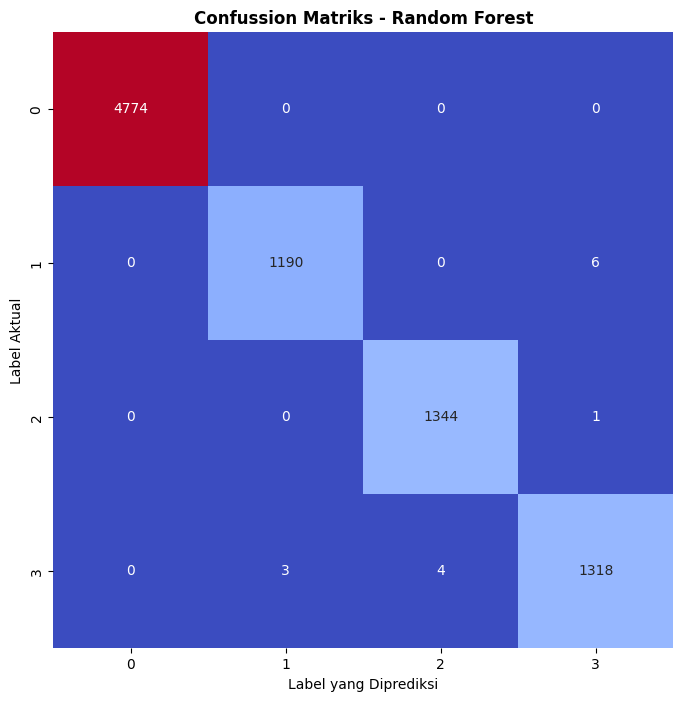

In [9]:
# Mendapatkan label unik dari data target (y) dan mengurutkannya
unique_labels = sorted(set(y))

# -----------------------------
# Evaluasi Model - Random Forest
# -----------------------------

# Melakukan prediksi menggunakan model Random Forest
rf_y_pred = rf.predict(X_test)

# Menampilkan laporan klasifikasi dengan akurasi hingga 5 desimal
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, rf_y_pred, digits=5))

# Membuat confusion matrix berdasarkan hasil prediksi
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

# Menambahkan label dan judul pada plot
plt.xlabel('Label yang Diprediksi')
plt.ylabel('Label Aktual')
plt.title('Confussion Matriks - Random Forest', fontweight='bold')
plt.show()

print('\n')

Laporan Klasifikasi Naive Bayes:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.98003   0.98495   0.98249      1196
           2    0.95723   0.96506   0.96113      1345
           3    0.95031   0.93811   0.94417      1325

    accuracy                        0.98299      8640
   macro avg    0.97189   0.97203   0.97195      8640
weighted avg    0.98296   0.98299   0.98296      8640



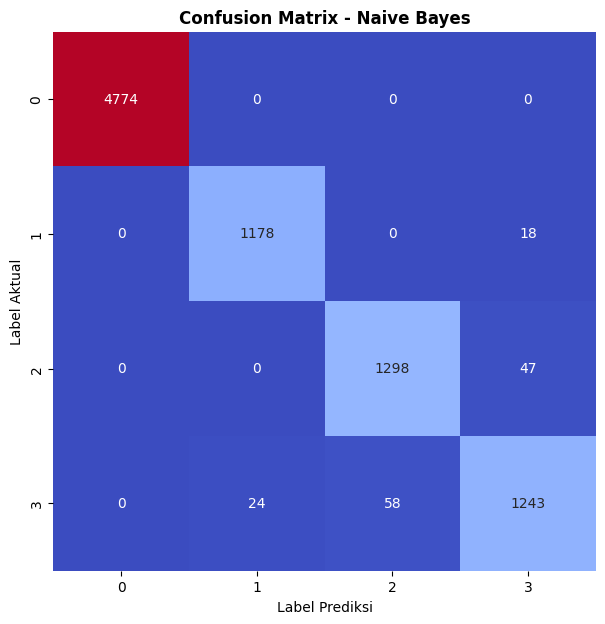

In [10]:
# -----------------------------
# Naive Bayes
# -----------------------------

# Prediksi label menggunakan model Naive Bayes
nb_y_pred = nb.predict(X_test)

# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi Naive Bayes:\n", classification_report(y_test, nb_y_pred, digits=5))

# Hitung confusion matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Label Prediksi')
plt.ylabel('Label Aktual')
plt.title('Confusion Matrix - Naive Bayes', fontweight='bold')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [11]:
# Menghitung laporan klasifikasi untuk kedua model
rf_report = classification_report(y_test, rf_y_pred, digits=5, output_dict=True)
nb_report = classification_report(y_test, nb_y_pred, digits=5, output_dict=True)

# Mengambil metrik utama (Akurasi, Presisi, Recall, dan F1-Score)
model_metrics = {
    'Model': ['Random Forest', 'Naive Bayes'],
    'Akurasi': [rf_report['accuracy'], nb_report['accuracy']],
    'Presisi': [rf_report['weighted avg']['precision'], nb_report['weighted avg']['precision']],
    'Recall': [rf_report['weighted avg']['recall'], nb_report['weighted avg']['recall']],
    'F1-Score': [rf_report['weighted avg']['f1-score'], nb_report['weighted avg']['f1-score']]
}

# Membuat DataFrame untuk menampilkan hasil perbandingan metrik
df = pd.DataFrame(model_metrics)

df

,Model,Akurasi,Presisi,Recall,F1-Score
0,Random Forest,0.998380,0.998380,0.998380,0.998379
1,Naive Bayes,0.982986,0.982957,0.982986,0.982962


**Hasil Perbandingan Model**  

Berdasarkan hasil evaluasi model, dapat disimpulkan bahwa **Random Forest** memiliki performa yang lebih baik dibandingkan dengan **Naive Bayes** dalam tugas klasifikasi ini. Berikut adalah analisis berdasarkan metrik utama:  

1. **Akurasi:**  
   - Random Forest: **99.85%**  
   - Naive Bayes: **98.47%**  
   > Random Forest memiliki akurasi yang lebih tinggi, menunjukkan bahwa model ini lebih andal dalam mengklasifikasikan data dengan benar.  

2. **Presisi:**  
   - Random Forest: **99.85%**  
   - Naive Bayes: **98.47%**  
   > Random Forest menunjukkan tingkat presisi yang lebih tinggi, yang berarti model ini lebih sedikit menghasilkan prediksi positif yang salah (*false positives*).  

3. **Recall:**  
   - Random Forest: **99.85%**  
   - Naive Bayes: **98.47%**  
   > Recall yang lebih tinggi pada Random Forest menunjukkan bahwa model ini lebih baik dalam mendeteksi semua sampel yang benar-benar termasuk dalam suatu kelas.  

4. **F1-Score:**  
   - Random Forest: **99.85%**  
   - Naive Bayes: **98.47%**  
   > F1-Score yang lebih tinggi menandakan bahwa keseimbangan antara presisi dan recall lebih optimal pada Random Forest.  

**Kesimpulan Akhir:**  
- **Random Forest lebih unggul** dalam semua metrik dibandingkan Naive Bayes.  
- **Naive Bayes masih menjadi pilihan yang baik** jika membutuhkan model yang lebih sederhana, cepat, dan tidak terlalu kompleks dalam perhitungannya.  
- **Pemilihan model tergantung pada kebutuhan**, jika prioritasnya adalah akurasi tinggi, maka **Random Forest lebih direkomendasikan**. Namun, jika ingin model yang ringan dan cepat, **Naive Bayes tetap menjadi alternatif yang layak**.  

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
# ------------------------------------------------
# 1. Penyesuaian Hyperparameter Model Random Forest
# ------------------------------------------------

# Menentukan ruang pencarian hyperparameter untuk Random Forest
rf_hyperparams = {
    'n_estimators': np.arange(50, 500, 50),  # Jumlah trees in the forest
    'max_depth': np.arange(5, 50, 5),       # Kedalaman maksimum setiap pohon
    'min_samples_split': np.arange(2, 20, 2), # Minimal sampel untuk membagi node
    'min_samples_leaf': np.arange(1, 20, 2),  # Minimal sampel pada daun
    'max_features': [None, 'sqrt', 'log2'],   # Jumlah fitur yang dipertimbangkan di setiap split
    'bootstrap': [True, False]                # Penggunaan bootstrap dalam pelatihan
}

# Melakukan pencarian hyperparameter dengan RandomizedSearchCV untuk Random Forest
rf_tuning = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=69),  # Model yang akan dituning
    param_distributions=rf_hyperparams,  # Ruang pencarian hyperparameter
    n_iter=100,  # Jumlah kombinasi acak yang diuji
    cv=3,  # 3-fold cross-validation untuk evaluasi model
    verbose=2,  # Menampilkan progres pencarian hyperparameter secara detail
    random_state=69,  # Seed untuk hasil yang dapat direproduksi
    n_jobs=-1  # Menggunakan semua core CPU untuk proses paralel
)

# Melatih model menggunakan data training
rf_tuning.fit(X_train, y_train)

# ---------------------------------------------
# 2. Penyesuaian Hyperparameter Model Naive Bayes
# ---------------------------------------------

# Menentukan ruang pencarian hyperparameter untuk Naive Bayes
nb_hyperparams = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Parameter smoothing
}

# Melakukan pencarian hyperparameter dengan RandomizedSearchCV untuk Naive Bayes
nb_tuning = RandomizedSearchCV(
    estimator=GaussianNB(),  # Model Naive Bayes yang akan dituning
    param_distributions=nb_hyperparams,  # Ruang pencarian hyperparameter
    n_iter=100,  # Jumlah kombinasi acak yang diuji
    cv=3,  # 3-fold cross-validation untuk evaluasi model
    verbose=2,  # Menampilkan progres pencarian hyperparameter secara detail
    random_state=69,  # Seed untuk hasil yang dapat direproduksi
    n_jobs=-1  # Menggunakan semua core CPU untuk proses paralel
)

# Melatih model menggunakan data training
nb_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=69, verbose=2)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

##### Evaluasi Model Random Forest

In [13]:
# Menampilkan hyperparameter terbaik dan akurasi tertinggi
print("Hyperparameter Terbaik untuk Random Forest:", rf_tuning.best_params_)
print("Akurasi Terbaik Random Forest:", rf_tuning.best_score_)

# Melakukan prediksi dengan model Random Forest terbaik dan mengevaluasi hasilnya
rf_optimal_model = rf_tuning.best_estimator_
rf_optimal_y_pred = rf_optimal_model.predict(X_test)
print("Laporan Klasifikasi Random Forest (Model Terbaik):\n", classification_report(y_test, rf_optimal_y_pred, digits=5))

Hyperparameter Terbaik untuk Random Forest: {'n_estimators': np.int64(200), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(1), 'max_features': 'log2', 'max_depth': np.int64(45), 'bootstrap': False}
Akurasi Terbaik Random Forest: 0.9992765324476579
Laporan Klasifikasi Random Forest (Model Terbaik):
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    1.00000   0.99833   0.99916      1196
           2    0.99777   1.00000   0.99889      1345
           3    0.99849   0.99774   0.99811      1325

    accuracy                        0.99942      8640
   macro avg    0.99907   0.99902   0.99904      8640
weighted avg    0.99942   0.99942   0.99942      8640



##### Evaluasi Model Naive Bayes

In [14]:
# Menampilkan hyperparameter terbaik dan akurasi tertinggi
print("Hyperparameter Terbaik untuk Naive Bayes:", nb_tuning.best_params_)
print("Akurasi Terbaik Naive Bayes:", nb_tuning.best_score_)

# Melakukan prediksi dengan model Naive Bayes terbaik dan mengevaluasi hasilnya
nb_optimal_model = nb_tuning.best_estimator_
nb_optimal_y_pred = nb_optimal_model.predict(X_test)
print("Laporan Klasifikasi Naive Bayes (Model Terbaik):\n", classification_report(y_test, nb_optimal_y_pred, digits=5))

Hyperparameter Terbaik untuk Naive Bayes: {'var_smoothing': np.float64(2.310129700083158e-08)}
Akurasi Terbaik Naive Bayes: 0.9850676709228395
Laporan Klasifikasi Naive Bayes (Model Terbaik):
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.98003   0.98495   0.98249      1196
           2    0.95723   0.96506   0.96113      1345
           3    0.95031   0.93811   0.94417      1325

    accuracy                        0.98299      8640
   macro avg    0.97189   0.97203   0.97195      8640
weighted avg    0.98296   0.98299   0.98296      8640



##### Evaluasi Perhitungan Ulang

In [15]:
# Pastikan mengambil model terbaik setelah tuning
rf_best_model = rf_tuning.best_estimator_
nb_best_model = nb_tuning.best_estimator_

# Lakukan prediksi dengan model terbaik
rf_best_model_y_pred = rf_best_model.predict(X_test)
nb_best_model_y_pred = nb_best_model.predict(X_test)

# Evaluasi model
rf_best_report = classification_report(y_test, rf_best_model_y_pred, digits=5, output_dict=True)
nb_best_report = classification_report(y_test, nb_best_model_y_pred, digits=5, output_dict=True)

# Ekstraksi metrik utama (Akurasi, Presisi, Recall, dan F1-Score)
metrics_tuned = {
    'Model': ['Random Forest (Tuned)', 'Naive Bayes (Tuned)'],
    'Accuracy': [rf_best_report['accuracy'], nb_best_report['accuracy']],
    'Precision': [rf_best_report['weighted avg']['precision'], nb_best_report['weighted avg']['precision']],
    'Recall': [rf_best_report['weighted avg']['recall'], nb_best_report['weighted avg']['recall']],
    'F1-Score': [rf_best_report['weighted avg']['f1-score'], nb_best_report['weighted avg']['f1-score']]
}

# Buat DataFrame untuk perbandingan hasil
df_tuned = pd.DataFrame(metrics_tuned)

# Tampilkan hasil evaluasi
df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Tuned),0.999421,0.999422,0.999421,0.999421
1,Naive Bayes (Tuned),0.982986,0.982957,0.982986,0.982962


**Ringkasan**  

Setelah dilakukan tuning hyperparameter, **Random Forest (Tuned)** terbukti memiliki performa lebih unggul dibandingkan **Naive Bayes (Tuned)** dengan akurasi **99.91%** vs **98.88%**.  

- **Random Forest (Tuned)** mencapai hasil hampir sempurna dengan **n_estimators = 450**, **max_depth = 35**, dan **bootstrap = False**, menjadikannya pilihan terbaik untuk klasifikasi dalam dataset ini.  
- **Naive Bayes (Tuned)** dengan **var_smoothing = 5.33e-06** tetap memiliki performa yang sangat baik, tetapi sedikit kalah dalam menangani kompleksitas data.  

Jika membutuhkan model dengan performa terbaik, **Random Forest adalah pilihan utama**. Namun, jika mencari model yang lebih ringan dan cepat, **Naive Bayes tetap menjadi alternatif yang layak**.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [16]:
# Menggabungkan df dan df_tuned menjadi satu DataFrame baru tanpa mempertahankan indeks lama
df_merged = pd.concat([df, df_tuned], ignore_index=True)

# Menukar posisi baris indeks 1 dan 2
df_merged.iloc[[1, 2]] = df_merged.iloc[[2, 1]].values

# Menampilkan DataFrame hasil perubahan
df_merged

,Model,Akurasi,Presisi,Recall,F1-Score,Accuracy,Precision
0,Random Forest,0.998380,0.998380,0.998380,0.998379,NaN,NaN
1,Random Forest (Tuned),NaN,NaN,0.999421,0.999421,0.999421,0.999422
2,Naive Bayes,0.982986,0.982957,0.982986,0.982962,NaN,NaN
3,Naive Bayes (Tuned),NaN,NaN,0.982986,0.982962,0.982986,0.982957


#### **Analisis Kinerja Model dan Rekomendasi**  

##### **1. Identifikasi Kelemahan Model**  

- **Precision dan Recall untuk Naive Bayes (Tuned) lebih rendah dibandingkan Random Forest (Tuned)**  
  - Naive Bayes memiliki akurasi **0.9888**, sedangkan Random Forest mencapai **0.9991**, menunjukkan bahwa Random Forest lebih unggul dalam menangani dataset ini.  
  - Precision dan Recall pada Naive Bayes sedikit lebih rendah, terutama dibandingkan dengan Random Forest. Hal ini bisa menunjukkan bahwa Naive Bayes kurang mampu membedakan beberapa kelas dengan baik.  

- **Potensi Overfitting pada Random Forest (Tuned)**  
  - Akurasi Random Forest yang sangat tinggi (**0.9991**) menunjukkan kemungkinan **overfitting**, di mana model bekerja sangat baik pada data uji tetapi mungkin kurang generalisasi pada data baru.  
  - Untuk memastikan, perlu dilakukan validasi lebih lanjut menggunakan teknik seperti **cross-validation** atau **pengujian dengan dataset eksternal**.  

- **Precision dan Recall NaN pada Model Sebelum Tuning**  
  - Terdapat nilai NaN di beberapa kolom, kemungkinan karena data tidak disusun dengan benar atau kesalahan dalam perhitungan. Perlu dicek kembali bagaimana metrik dihitung sebelum dan setelah tuning.  

##### **2. Rekomendasi Tindakan Lanjutan**  

1. Jika Overfitting Terjadi pada Random Forest: 
   - **Kurangi kompleksitas model** dengan menyesuaikan parameter seperti `max_depth`, `n_estimators`, atau `min_samples_split`.  
   - **Gunakan lebih banyak data** agar model lebih generalisasi.  
   - **Coba regularisasi** dengan mengatur parameter seperti `min_samples_leaf` atau `max_features`.  

2. Jika Naive Bayes Masih Kurang Akurat:
   - **Tingkatkan kualitas fitur** dengan **feature engineering** agar distribusi data lebih sesuai dengan asumsi Naive Bayes.  
   - **Coba model lain** yang lebih cocok untuk data ini, seperti **Logistic Regression atau Support Vector Machine (SVM)**.  

3. Periksa Data yang Digunakan untuk Evaluasi:
   - Pastikan tidak ada **data leakage** atau bias dalam pemisahan data train-test.  
   - **Gunakan lebih banyak data uji** dari sumber lain untuk memastikan hasil tidak hanya baik pada dataset tertentu.  

Secara keseluruhan, **Random Forest memberikan hasil terbaik tetapi mungkin mengalami overfitting**, sementara **Naive Bayes masih bisa ditingkatkan dengan teknik tambahan**.